## Business Objective:
### Generate the features from the dataset and use them to recommend the book accordingly to t useress.

## Content
### The Book-Crossing dataset comprises 3 files.

### Users- Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL valu

#### Books- Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in thee different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. Tese URLs point to the Amazon web

#### Ratings- Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.site. es.



In [1]:
# Importing requred  libries 
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
import requests
import re

In [2]:
books = pd.read_csv("Books.csv", encoding = 'ISO-8859-1')
rating = pd.read_csv("Ratings.csv", encoding = 'ISO-8859-1')
users = pd.read_csv("Users.csv", encoding = 'ISO-8859-1')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print("Books Shape:", books.shape)
print("Ratings Shape:", rating.shape)
print("Users Shape:", users.shape)

Books Shape: (271360, 8)
Ratings Shape: (1149780, 3)
Users Shape: (278858, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [14]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [15]:
users['Age'].fillna(value=34.75, inplace=True)

In [16]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

<Axes: >

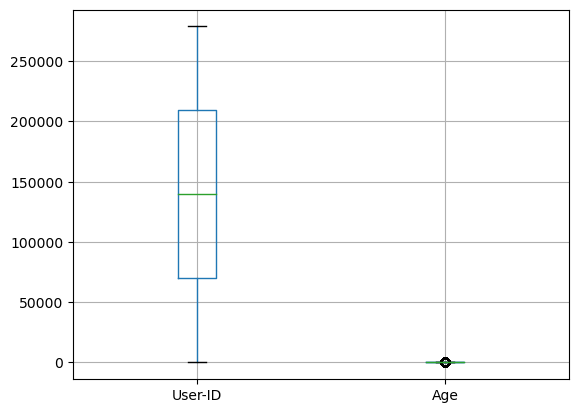

In [17]:
users.boxplot()

<Axes: >

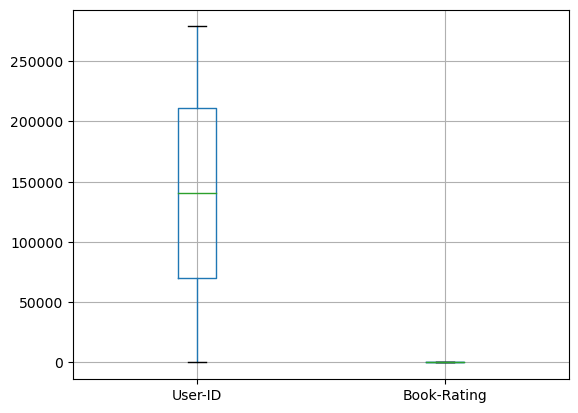

In [18]:
rating.boxplot()

In [19]:
books.iloc[:, :-3] ##removed the URLS

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [20]:
# Merge 'Ratings' with 'Users' on the 'User-ID' column
ratings_users = pd.merge(rating, users, on='User-ID', how='inner')



In [21]:
ratings_users.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",34.75
1,276726,0155061224,5,"seattle, washington, usa",34.75
2,276727,0446520802,0,"h, new south wales, australia",16.00
3,276729,052165615X,3,"rijeka, n/a, croatia",16.00
4,276729,0521795028,6,"rijeka, n/a, croatia",16.00


In [22]:
ratings_users.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Location       0
Age            0
dtype: int64

In [23]:
# Now merge the resulting DataFrame with 'Books' on the 'ISBN' column
merged_data = pd.merge(ratings_users, books, on='ISBN', how='inner')

In [24]:
merged_data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [25]:
mergeddata = merged_data.iloc[:, :-3] ##to remove the URLS

In [26]:
mergeddata.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [27]:
mergeddata.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [28]:
mergeddata.shape

(1031136, 9)

In [29]:
mergeddata_final = mergeddata.dropna()

In [30]:
mergeddata_final

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",34.75,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,"fort lee, new jersey, usa",34.75,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,"wakeman, ohio, usa",43.00,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,"cedar park, texas, usa",34.75,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [31]:
mergeddata_final.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [32]:
mergeddata_final.corr()

,User-ID,Book-Rating,Age
User-ID,1.000000,-0.044019,-0.010066
Book-Rating,-0.044019,1.000000,-0.024448
Age,-0.010066,-0.024448,1.000000


In [33]:
mergeddata_final.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


## Popularity Based Filtering

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.


In [34]:
# Filter out books with few ratings to focus on popular ones
# Set a threshold for minimum number of ratings for popularity (e.g., 7 ratings)
min_ratings = 7
popular_books = mergeddata_final.groupby('Book-Title').filter(lambda x: x['Book-Rating'].count() >= min_ratings)

# Calculate the average rating and the number of ratings for each book
book_popularity = popular_books.groupby('Book-Title').agg(
    average_rating=('Book-Rating', 'mean'),
    num_ratings=('Book-Rating', 'count')
).reset_index()

# Sort books by popularity (number of ratings) and then by average rating
book_popularity = book_popularity.sort_values(by=['num_ratings', 'average_rating'], ascending=[False, False])

# Display the most popular books
print("Top Popular Books:")
print(book_popularity.head(10))



Top Popular Books:
                                            Book-Title  average_rating  \
25829                                      Wild Animus        1.019584   
21444                        The Lovely Bones: A Novel        4.468726   
19666                                The Da Vinci Code        4.642539   
590                                    A Painted House        3.231504   
21808                       The Nanny Diaries: A Novel        3.530193   
3078                             Bridget Jones's Diary        3.527607   
22716                          The Secret Life of Bees        4.447028   
5717   Divine Secrets of the Ya-Ya Sisterhood: A Novel        3.437838   
22422              The Red Tent (Bestselling Backlist)        4.334716   
1591                               Angels &amp; Demons        3.708955   

       num_ratings  
25829         2502  
21444         1295  
19666          898  
590            838  
21808          828  
3078           815  
22716          774 

In [35]:
# Optional: Filtering by user demographics (e.g., by location or age group)
def filter_by_location_age(mergeddata_final, location=None, min_age=None, max_age=None):
    if location:
        mergeddata_final = mergeddata_final[mergeddata_final['Location'].str.contains(location, case=False, na=False)]
    if min_age is not None and max_age is not None:
        mergeddata_final = mergeddata_final[(mergeddata_final['Age'] >= min_age) & (mergeddata_final['Age'] <= max_age)]
    return mergeddata_final



# Example: Filter recommendations for users from a specific location and age group
filtered_df = filter_by_location_age(mergeddata_final, location='USA', min_age=25, max_age=40)
filtered_popular_books = filtered_df.groupby('Book-Title').agg(
    average_rating=('Book-Rating', 'mean'),
    num_ratings=('Book-Rating', 'count')
).reset_index().sort_values(by=['num_ratings', 'average_rating'], ascending=[False, False])

# Display the most popular books for this demographic
print("Top Popular Books for filtered demographic:")
print(filtered_popular_books.head(10))

Top Popular Books for filtered demographic:
                                             Book-Title  average_rating  \
127997                                      Wild Animus        0.971168   
106225                        The Lovely Bones: A Novel        4.782324   
107994                       The Nanny Diaries: A Novel        3.618257   
3180                                    A Painted House        3.393305   
112307                          The Secret Life of Bees        4.408776   
28091   Divine Secrets of the Ya-Ya Sisterhood: A Novel        3.720930   
98585                                 The Da Vinci Code        4.628571   
111055              The Red Tent (Bestselling Backlist)        4.506203   
15811                             Bridget Jones's Diary        3.390181   
86247                            Snow Falling on Cedars        3.068966   

        num_ratings  
127997          659  
106225          611  
107994          482  
3180            478  
112307          433 

In [36]:
# Calculate the average rating for each book (this is our "predicted" rating for each book)
book_avg_ratings = mergeddata_final.groupby('Book-Title')['Book-Rating'].mean().reset_index()
book_avg_ratings.columns = ['Book-Title', 'Predicted-Rating']

# Merge the predicted ratings with the original dataset to get actual ratings
df_with_predictions = mergeddata_final.merge(book_avg_ratings, on='Book-Title', how='left')

# Calculate the RMSE
rmse = np.sqrt(((df_with_predictions['Book-Rating'] - df_with_predictions['Predicted-Rating']) ** 2).mean())

print("RMSE of the popularity-based model:", rmse)

RMSE of the popularity-based model: 3.275794963245032


##### Explanation

Predicted Rating Calculation: We compute the mean rating for each book, treating it as the predicted rating for all users of that book.

Merge with Actual Ratings: We merge these predicted ratings with the original dataset to align each book’s predicted rating with the actual ratings.

Calculate RMSE : we compute the RMSE by taking the square root of the mean squared error between actual and predicted ratings.

# Collaborative Filtering Model

A collaborative filtering model recommends books based on users' interactions with similar users or items. Since your dataset includes user ratings, we can create a collaborative filtering model using matrix factorization, a common technique for collaborative filtering. Specifically, we’ll use Singular Value Decomposition (SVD) to predict ratings.

In [47]:
# Load your dataset (replace 'dataset.csv' with the actual path to your dataset)
df = mergeddata_final


In [48]:
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.00,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",34.75,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse import csr_matrix


# Drop rows with missing essential data
df = df.dropna(subset=['User-ID', 'ISBN', 'Book-Rating'])

# Ensure the ratings are numeric
df['Book-Rating'] = pd.to_numeric(df['Book-Rating'], errors='coerce')

# Filter the dataset for a manageable subset of users and books (optional but recommended)
# For example, consider only books with at least 50 ratings and users who have rated at least 50 books
book_counts = df['ISBN'].value_counts()
user_counts = df['User-ID'].value_counts()
df_filtered = df[df['ISBN'].isin(book_counts[book_counts >= 50].index) & 
                 df['User-ID'].isin(user_counts[user_counts >= 50].index)]

# Create a sparse user-item matrix
user_item_matrix = csr_matrix((df_filtered['Book-Rating'], 
                               (df_filtered['User-ID'].astype('category').cat.codes, 
                                df_filtered['ISBN'].astype('category').cat.codes)))

# Verify the matrix dimensions
print(f"Sparse user-item matrix dimensions: {user_item_matrix.shape}")

# Apply SVD to the sparse matrix
svd = TruncatedSVD(n_components=50, random_state=42)
matrix_reduced = svd.fit_transform(user_item_matrix)

# Reconstruct the user-item matrix with predicted ratings
matrix_pred = np.dot(matrix_reduced, svd.components_)

# Calculate RMSE using only the known ratings
actual_ratings = user_item_matrix.toarray()[user_item_matrix.toarray().nonzero()]
predicted_ratings = matrix_pred[user_item_matrix.toarray().nonzero()]
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"RMSE of the collaborative filtering model: {rmse}")

Sparse user-item matrix dimensions: (2997, 2161)
RMSE of the collaborative filtering model: 6.519779524166505


# Content Based Model 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse import csr_matrix

# Combine text-based features to form a "content" feature
df['content'] = df['Book-Title'] + ' ' + df['Book-Author'] + ' ' + df['Publisher'] + ' ' + df['Year-Of-Publication'].astype(str)

# Vectorize the content feature using TF-IDF and convert to a sparse matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

# Reduce dimensions using TruncatedSVD to avoid memory issues (e.g., reduce to 100 components)
svd = TruncatedSVD(n_components=100)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Helper function to get similar books' ratings
def get_similar_books_ratings(user_id, book_title, top_n=5):
    # Find the index of the book in the dataset
    idx = df[df['Book-Title'] == book_title].index[0]
    
    # Calculate cosine similarity for this book with all other books
    sim_scores = cosine_similarity(tfidf_matrix_reduced[idx].reshape(1, -1), tfidf_matrix_reduced).flatten()
    
    # Sort by similarity score and get top_n most similar books
    sim_scores_idx = np.argsort(sim_scores)[::-1][1:top_n+1]  # Skip the first book itself (similarity = 1)
    
    # Get ratings of similar books rated by the same user
    similar_books = df.iloc[sim_scores_idx]
    similar_books_ratings = similar_books[similar_books['User-ID'] == user_id]['Book-Rating']
    
    # Predict rating by averaging ratings of similar books by the same user, or fallback to overall book rating
    if not similar_books_ratings.empty:
        return similar_books_ratings.mean()
    else:
        return df[df['Book-Title'] == book_title]['Book-Rating'].mean()

# Predict ratings for each user's book based on similar books
predicted_ratings = []
actual_ratings = []

for index, row in df.iterrows():
    user_id = row['User-ID']
    book_title = row['Book-Title']
    actual_rating = row['Book-Rating']
    
    # Predict rating based on similar books
    predicted_rating = get_similar_books_ratings(user_id, book_title)
    
    # Append actual and predicted ratings for RMSE calculation
    actual_ratings.append(actual_rating)
    predicted_ratings.append(predicted_rating)

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print("RMSE of the content-based model:", rmse)